<a href="https://colab.research.google.com/github/MSaber7/ML/blob/master/BayesianNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Network

Explore existing file formats for representing Bayesian networks. Choose any of the formats you like. You can use the existing parsers for networks of the selected file format.

Implement two Bayesian probability inference algorithms, which will answers to requests for any subset of variables. For example of the form P(A = ai & B = bj & D = dk), note that C is missing. The first algorithm should calculate the exact answer. The second algorithm should use random sampling to calculate the required probability.

For several queries, calculate the probability using both algorithms. For the second algorithm plot dependence of current probability on number sampled instances.

Datasets can be taken from http://www.bnlearn.com/bnrepository/ or http://www.cs.huji.ac.il/~galel/Repository/


## Library

In [92]:
pip install pgmpy

In [0]:
import numpy as np
import os
import copy
from pgmpy import readwrite
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
from collections import defaultdict
from functools import reduce

## Load Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = 'drive/My Drive/Colab Notebooks/Data/cancer.bif'
cancer = readwrite.BIF.BIFReader(path)

## Bayesian Probability Inference algorithms

### Cancer Data

In [96]:
variables = cancer.get_variables()
probability = cancer.get_probability_grammar()
print(variables)
model = cancer.get_model()
cancer_infer = VariableElimination(model)

cancer_infer = VariableElimination(model)
cpd_pollu = model.get_cpds('Pollution')
cpd_smoker =model.get_cpds('Smoker')
cpd_cancer = model.get_cpds('Cancer')
cpd_xray = model.get_cpds('Xray')
cpd_dysp = model.get_cpds('Dyspnoea')
print(cpd_pollu)
print(cpd_smoker)
print(cpd_cancer)
print(cpd_xray)
print(cpd_dysp)

['Pollution', 'Smoker', 'Cancer', 'Xray', 'Dyspnoea']
+-----------------+-----+
| Pollution(low)  | 0.9 |
+-----------------+-----+
| Pollution(high) | 0.1 |
+-----------------+-----+
+---------------+-----+
| Smoker(True)  | 0.3 |
+---------------+-----+
| Smoker(False) | 0.7 |
+---------------+-----+
+---------------+----------------+----------------+-----------------+-----------------+
| Pollution     | Pollution(low) | Pollution(low) | Pollution(high) | Pollution(high) |
+---------------+----------------+----------------+-----------------+-----------------+
| Smoker        | Smoker(True)   | Smoker(False)  | Smoker(True)    | Smoker(False)   |
+---------------+----------------+----------------+-----------------+-----------------+
| Cancer(True)  | 0.03           | 0.001          | 0.05            | 0.02            |
+---------------+----------------+----------------+-----------------+-----------------+
| Cancer(False) | 0.97           | 0.999          | 0.95            | 0.98      

In [123]:
varis = ['Pollution','Smoker','Xray']
vari_type = {'Pollution':1,'Smoker':1,'Xray':1}

def Joint_P_byproduct(model = model,varis = varis,vari_type = vari_type):
    varis = ['Pollution','Smoker','Xray']
    all_nodes = model.nodes()
    factors = defaultdict(list)
    all_unique_factors = set()
    for node in all_nodes:
        cpd = model.get_cpds(node)
        cpd = cpd.to_factor()
        for var in cpd.scope():
            factors[var].append(cpd)
    for node in all_nodes:    
        for factor in factors[node]:
            if not {factor}.intersection(all_unique_factors):
                all_unique_factors.add(factor)
    product_distribution = reduce(lambda dist1, dist2: dist1 * dist2, all_unique_factors)
    joint_factor = product_distribution.marginalize(list(set(all_nodes) - set(varis)), inplace=False)

    pd_values = product_distribution.values
    for i in range(len(product_distribution.variables)):
        var = product_distribution.variables[i]
        if var in vari_type.keys():
            type_var =  vari_type[var]
            pd_values = pd_values[type_var]
        else:
            tem_values = np.zeros(pd_values[0].shape)
            for j in range(product_distribution.get_cardinality([var])[var]):
                tem_values += pd_values[j]
            pd_values = tem_values
    Joint_p = pd_values
    return Joint_p
   
P = Joint_P_byproduct()

P

0.05502

In [0]:
def Joint_P_byproduct(model = model,varis = varis):

    varis = ['Pollution','Smoker','Xray']
    all_nodes = model.nodes()
    factors = defaultdict(list)
    all_unique_factors = set()

    for node in all_nodes:
        cpd = model.get_cpds(node)
        cpd = cpd.to_factor()
        for var in cpd.scope():
            factors[var].append(cpd)
    for node in all_nodes:    
        for factor in factors[node]:
            if not {factor}.intersection(all_unique_factors):
                all_unique_factors.add(factor)
                
    product_distribution = reduce(lambda dist1, dist2: dist1 * dist2, all_unique_factors)
    joint_factor = product_distribution.marginalize(list(set(all_nodes) - set(varis)), inplace=False)

    return joint_factor, product_distribution

In [143]:
varis = ['Pollution','Smoker','Xray']    
vari_type = [1,1,1]
joint_factor = Joint_P_byproduct(model = model,varis = varis)

print(joint_factor)

(<DiscreteFactor representing phi(Pollution:2, Smoker:2, Xray:2) at 0x7f0b403e6630>, <DiscreteFactor representing phi(Pollution:2, Cancer:2, Smoker:2, Dyspnoea:2, Xray:2) at 0x7f0b403e6048>)


In [0]:
def Joint_P(varis = {'Pollution':1,'Smoker':1,'Xray':1},model = model):
    P = 1
    varis_list = list(varis.keys())
    
    for i in range(len(varis_list)):
        print('The variable which gonna calulate probability:',varis_list[i])
        tem_cpd = model.get_cpds(varis_list[i])
        tem_dict = {}
        tem_vari = copy.deepcopy(varis_list[i])

        tem_vari.remove(varis_list[i])
        for k in range(len(tem_vari)):
            if tem_vari[k] in tem_dict.keys():
                print('something wrong')
            else:
                tem_dict.update({tem_vari[k]:varis[tem_vari[k]]})
        print(tem_dict)
        prob = cancer_infer.query(variables= [varis_list[i]],evidence= tem_dict)
        print(prob[varis_list[i]].values)
        P = P * prob[varis_list[i]].values[varis[varis_list[i]]]

    return P
    

In [151]:
p = Joint_P()
print('joint_prob_PSX:',p)

 The variable which gonna calulate probability: Pollution
{'Smoker': 1, 'Xray': 1}
[0.89753618 0.10246382]
The variable which gonna calulate probability: Smoker
{'Pollution': 1, 'Xray': 1}
[0.30353549 0.69646451]
The variable which gonna calulate probability: Xray
{'Pollution': 1, 'Smoker': 1}
[0.214 0.786]
joint_prob_PSX: 0.05609086035519241




### Asia Data

In [0]:
asia_path = 'drive/My Drive/Colab Notebooks/Data/asia.bif'
asia = readwrite.BIF.BIFReader(asia_path)

In [27]:
variables_asia = asia.get_variables()
print(variables_asia)
asia_model = asia.get_model()

['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']


In [28]:
cpd_asia = asia_model.get_cpds('asia')
cpd_tub =asia_model.get_cpds('tub')
cpd_smoke = asia_model.get_cpds('smoke')
cpd_lung = asia_model.get_cpds('lung')
cpd_bronc = asia_model.get_cpds('bronc')
cpd_either = asia_model.get_cpds('either')
cpd_xray = asia_model.get_cpds('xray')
cpd_dysp = asia_model.get_cpds('dysp')

print(cpd_asia )
print(cpd_tub)
print(cpd_smoke)
print(cpd_lung)
print(cpd_bronc)
print(cpd_either)
print(cpd_xray)
print(cpd_dysp)

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+
+----------+-----------+----------+
| asia     | asia(yes) | asia(no) |
+----------+-----------+----------+
| tub(yes) | 0.05      | 0.01     |
+----------+-----------+----------+
| tub(no)  | 0.95      | 0.99     |
+----------+-----------+----------+
+------------+-----+
| smoke(yes) | 0.5 |
+------------+-----+
| smoke(no)  | 0.5 |
+------------+-----+
+-----------+------------+-----------+
| smoke     | smoke(yes) | smoke(no) |
+-----------+------------+-----------+
| lung(yes) | 0.1        | 0.01      |
+-----------+------------+-----------+
| lung(no)  | 0.9        | 0.99      |
+-----------+------------+-----------+
+------------+------------+-----------+
| smoke      | smoke(yes) | smoke(no) |
+------------+------------+-----------+
| bronc(yes) | 0.6        | 0.3       |
+------------+------------+-----------+
| bronc(no)  | 0.4        | 0.7       |
+------------+-----------

In [29]:
cpd_either.variables

['either', 'lung', 'tub']

## Sampling

In [30]:
b =[]
K = 0
for i in range(1000):
    a = np.random.choice(2,1,p=[0.9,0.1])
    
    if a[0] == 1:
        K += 1
    else:
        pass

print(K)

88


In [31]:
cpd_smoker.values

array([0.3, 0.7])

In [0]:
def sampling(model = model, num_sample = 10):
    sample_dict = {}
    num = 0
    while num < num_sample:
        num += 1
        samples = []
        for vari in variables:
            tem_cpd = model.get_cpds(vari)
            vari_value = tem_cpd.values
            card = tem_cpd.variable_card
            parents = tem_cpd.variables[1:]
            if parents:
                parents_card = []
                for parent in parents:
                    tem_index = variables.index(parent)
                    parents_card.append(samples[tem_index])
                #print('all_values',vari_value)
                tem_value = []
                for l in range(vari_value.shape[0]):
                    anyway = vari_value[l]
                    for k in parents_card:
                        anyway = anyway[k]
                        #print('step value:',anyway)
                    tem_value.append(anyway)
                #print('probability:',tem_value)
                tem_sample = np.random.choice(card,1,p=tem_value)
                samples.append(tem_sample[0])
            else:
                tem_sample = np.random.choice(card,1,p=vari_value)
                samples.append(tem_sample[0])
            tup_samples = tuple(samples)
        
        if tup_samples in sample_dict.keys():
            sample_dict[tup_samples] += 1
        else:
            sample_dict.update({tup_samples:1})
    return sample_dict
    

In [33]:
all_dict = sampling(num_sample = 100000)
all_dict

{(0, 0, 0, 0, 0): 448,
 (0, 0, 0, 0, 1): 268,
 (0, 0, 0, 1, 0): 55,
 (0, 0, 0, 1, 1): 24,
 (0, 0, 1, 0, 0): 1535,
 (0, 0, 1, 0, 1): 3633,
 (0, 0, 1, 1, 0): 6203,
 (0, 0, 1, 1, 1): 14667,
 (0, 1, 0, 0, 0): 43,
 (0, 1, 0, 0, 1): 22,
 (0, 1, 0, 1, 0): 4,
 (0, 1, 0, 1, 1): 2,
 (0, 1, 1, 0, 0): 3786,
 (0, 1, 1, 0, 1): 8753,
 (0, 1, 1, 1, 0): 15089,
 (0, 1, 1, 1, 1): 35477,
 (1, 0, 0, 0, 0): 81,
 (1, 0, 0, 0, 1): 42,
 (1, 0, 0, 1, 0): 3,
 (1, 0, 0, 1, 1): 12,
 (1, 0, 1, 0, 0): 172,
 (1, 0, 1, 0, 1): 415,
 (1, 0, 1, 1, 0): 685,
 (1, 0, 1, 1, 1): 1591,
 (1, 1, 0, 0, 0): 81,
 (1, 1, 0, 0, 1): 39,
 (1, 1, 0, 1, 0): 2,
 (1, 1, 0, 1, 1): 4,
 (1, 1, 1, 0, 0): 367,
 (1, 1, 1, 0, 1): 945,
 (1, 1, 1, 1, 0): 1743,
 (1, 1, 1, 1, 1): 3809}

In [34]:
dic = {'Pollution':1,'Smoker':1,'Xray':1}
index = []
for vari in dic.keys():
    index.append(variables.index(vari))
print(index)



[0, 1, 3]


In [0]:
def count_P(varis = variables, all_dic = all_dict,sample_dict = dic,num_sample = 10):
    count = 0
    for sample in all_dict.keys():
        #sample = (1, 0, 0, 0, 0)
        tem_dict = {}
        for i in range(len(varis)):
            if varis[i] in tem_dict.keys():
                print('wrong')
            else:
                tem_dict.update({varis[i]:sample[i]})
        if tem_dict.items() & sample_dict.items() == sample_dict.items():
            count += all_dic[sample]

    P = count/num_sample
    return P
    
#tem_dict
    

In [36]:
P_psx = count_P(num_sample = 100000)
P_psx

0.05558

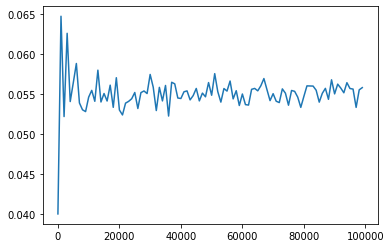

In [37]:
P_list =[]
num_epoch = 100000
X = np.arange(50,num_epoch,1000)
for num in range(50,num_epoch,1000):
    dic = {'Pollution':1,'Smoker':1,'Xray':1}
    all_dict = sampling(num_sample = num)
    P = count_P(all_dic=all_dict,sample_dict = dic,num_sample = num)
    P_list.append(P)


plt.figure()
plt.plot(X,P_list)
plt.show()

In [38]:
num_epoch = 100000
a = []
X = np.arange(1,num_epoch,2000)
print(len(X))
# for num in range(1,num_epoch,100):
#     a.append(num)
# print(a)

50
